In [1]:
import pandas as pd
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read in csv data file

data = pd.read_csv("data_archive/train.csv")

In [3]:
sales_df=pd.DataFrame(data)
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
sales_df.count()

Row ID           9800
Order ID         9800
Order Date       9800
Ship Date        9800
Ship Mode        9800
Customer ID      9800
Customer Name    9800
Segment          9800
Country          9800
City             9800
State            9800
Postal Code      9789
Region           9800
Product ID       9800
Category         9800
Sub-Category     9800
Product Name     9800
Sales            9800
dtype: int64

In [5]:
sales_df.dropna(axis=0, inplace=True)
sales_df.count()

Row ID           9789
Order ID         9789
Order Date       9789
Ship Date        9789
Ship Mode        9789
Customer ID      9789
Customer Name    9789
Segment          9789
Country          9789
City             9789
State            9789
Postal Code      9789
Region           9789
Product ID       9789
Category         9789
Sub-Category     9789
Product Name     9789
Sales            9789
dtype: int64

<Axes: xlabel='Unique Zip codes', ylabel='Number of Orders Placed'>

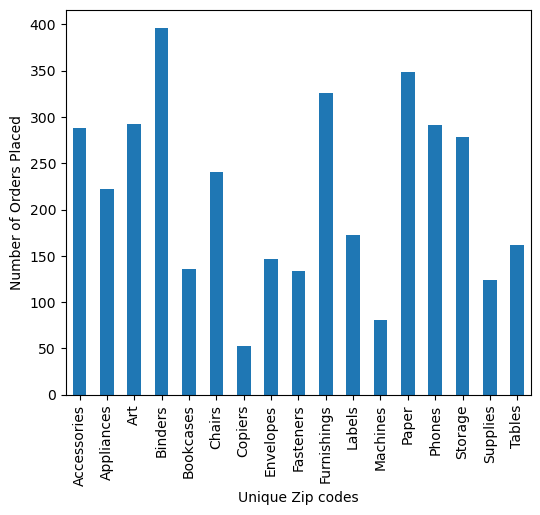

In [6]:
# Where are different sub categories most popular?
#  -group by category, count unique zip codes per category, bar graph of this information



categories_df = sales_df.groupby("Sub-Category")["Postal Code"].nunique()
categories_df.plot(kind = 'bar',ylabel='Number of Orders Placed',
         xlabel='Unique Zip codes', figsize=(6, 5))



Text(0.5, 1.0, 'Sales $ per region')

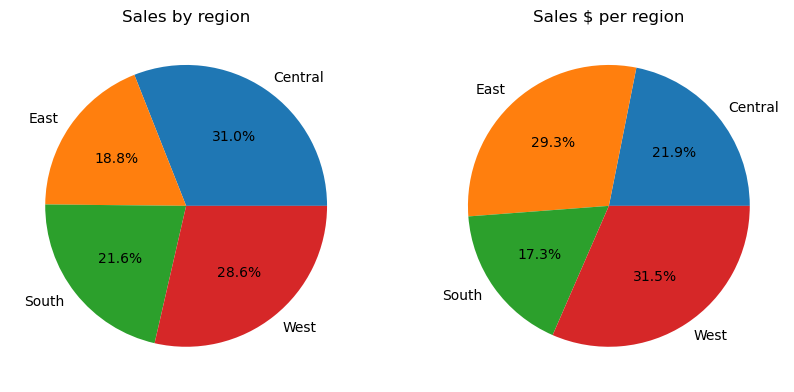

In [7]:
# Total Sales per region  

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

labels = 'Central', 'East' , 'South', 'West'
values = sales_df.groupby("Region")["Postal Code"].nunique()
ax1.pie(values,labels = labels,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Sales by region')

# Total Sales in Dollar value  per region  

labels = 'Central', 'East' , 'South', 'West'
values = sales_df.groupby("Region")["Sales"].sum()
ax2.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
ax2.set_title('Sales $ per region')

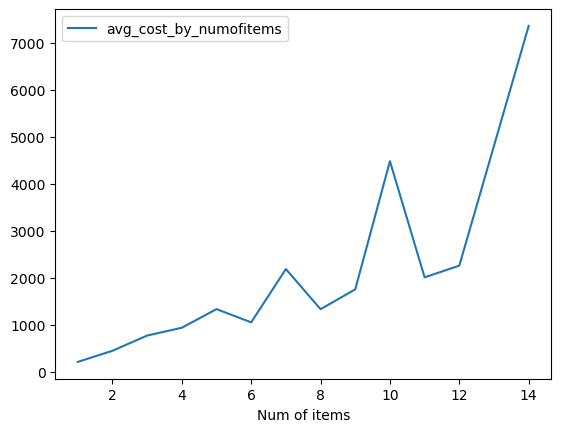

In [8]:
# Avg Cost by number of items purchased 

num_of_orders = sales_df.groupby('Order ID')["Order ID"].value_counts().to_frame('Num of items').reset_index()

total_sales_cost = sales_df.groupby('Order ID')["Sales"].sum().to_frame('Total cost').reset_index()


order_df = pd.merge(num_of_orders, total_sales_cost, on='Order ID')

avg_sales_df =order_df.groupby('Num of items')["Total cost"].mean().to_frame('avg_cost_by_numofitems').reset_index()

lines = avg_sales_df.plot.line(x="Num of items",y="avg_cost_by_numofitems")


In [9]:
# What products/sales are the most popular during specific times of the year?

sales_df_sort =  sales_df.sort_values(by='Order Date',ascending=False)

In [10]:
#converting dates to more useable format
sales_df_sort["Order Date"] = pd.to_datetime(sales_df_sort["Order Date"], dayfirst =True)

In [11]:
#create a column to store order month
sales_df_sort["Month"] = sales_df_sort["Order Date"].dt.month

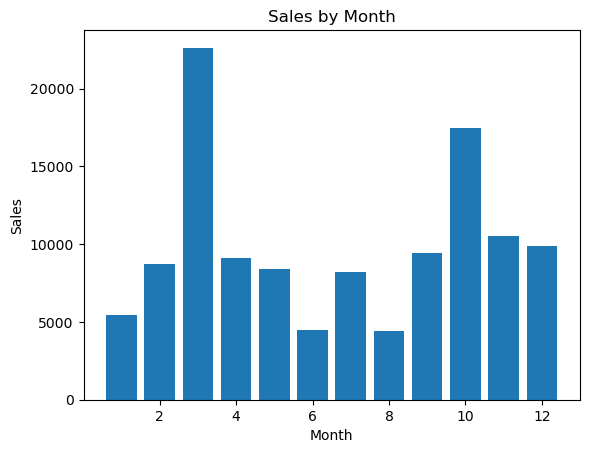

In [12]:
#graph data sales amount vs. month of order
x = sales_df_sort["Month"]
y = sales_df_sort["Sales"]

plt.bar(x, y)
plt.title("Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [13]:
#sort sales by category
sales_by_category = sales_df_sort.groupby("Category").size().reset_index(name="count")
sales_by_category
sales_by_category_pivot = pd.pivot_table(sales_df_sort, index = "Category", values="Sales", aggfunc="count")
sales_by_category_pivot

,Sales
Category,
Furniture,2076
Office Supplies,5903
Technology,1810


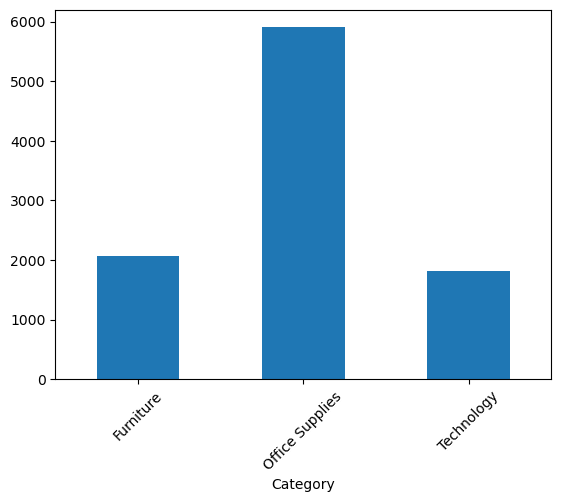

In [14]:
#plot sales vs. categories
sales_by_category_pivot.plot(kind="bar", legend=None)
plt.xticks(rotation=45)
plt.show()


In [15]:
#group sales into sub-categories and find the sub-categories with the highest sales
sub_category_sales = sales_df_sort.groupby("Sub-Category")["Sales"].sum()
top_sub_category = sub_category_sales.nlargest(7)
top_sub_category

Sub-Category
Phones         326487.698
Chairs         322107.531
Storage        217779.102
Tables         202810.628
Binders        200028.785
Machines       189238.631
Accessories    163881.690
Name: Sales, dtype: float64

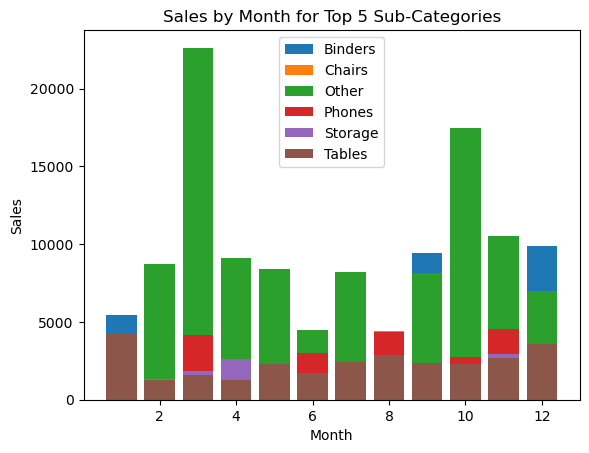

In [16]:
# Look into Other categories 
sub_categories = ["Phones", "Chairs", "Storage", "Tables", "Binders"]
sales_df_sort["Category_Grouped"] = sales_df_sort["Sub-Category"].apply(lambda x: x if x in sub_categories else "Other")
grouped_data = sales_df_sort.groupby("Category_Grouped")

for name, group in grouped_data:
    plt.bar(group["Month"], group["Sales"], label=name)
    
plt.title("Sales by Month for Top 5 Sub-Categories")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [17]:
# Where are the most orders being placed?

# create new df with superfluous columns removed
sales_df_red=sales_df.drop(columns=['Row ID'
                                    ,'Ship Mode'
                                    ,'Product ID'
                                    ,'Product Name'
                                    ,'Customer Name'
                                    ,'Segment'
                                    ,'Customer ID'
                                    ,'Country'])


In [18]:
# group data by state
sales_df_obs=pd.DataFrame(sales_df_red.groupby('State')['Order ID'].nunique())

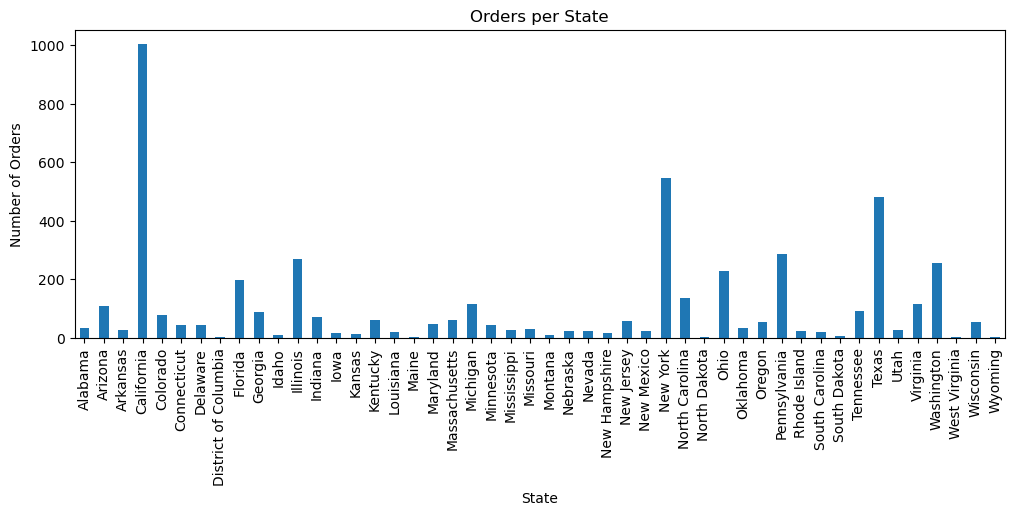

In [19]:
# plot number of unique order ids vs state
obsplot= sales_df_obs.plot(kind='bar'
                 ,title='Orders per State'
                 ,xlabel='State'
                 ,ylabel='Number of Orders'
                 ,figsize=(12,4)
                 ,legend=False)

In [20]:
# break down location of orders further by city within state
sales_df_geo=pd.DataFrame(sales_df_red.groupby(['State','City'])['Order ID'].nunique())

#export list of cities and states to csv
sales_df_geo.to_csv("location_list.csv")

In [21]:
# in order to plot by location, it will require fetching latitude and longitude of each city named
# this is accomplished by a different file called Cities location API call and outputs 
# a csv file with the cities, states, and their coordinates stored in a dataframe
# read in this dataframe from csv

city_coords_df=pd.read_csv("city_coords.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'city_coords.csv'

In [ ]:
# Configure the map plot of order numbers by location
obs_map=city_coords_df.hvplot.points(
    'Longitude',
    'Latitude',
    geo= True,
    color='City',
    tiles='CartoDark',
    size='Order Quantity',
    scale=1)

# Display the map
obs_map